# Analyse

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import missingno as msno
from wordcloud import WordCloud

### Importation 

In [3]:
# # Charger le jeu de données dans un DataFrame pandas
# artists = pd.read_csv('artists.csv')
# tracks = pd.read_csv('tracks.csv')

In [4]:
# Charger le jeu de données dans un DataFrame pandas
df = pd.read_csv('spotify.csv')

In [5]:
# tracks.head(1)

In [6]:
# df = artists.merge(tracks, on = 'id')

### Exploration 

In [7]:
df.head()

,Unnamed: 0,artist_name,album_name,album_id,track_name,track_id,popularity,release_date,duration_ms,explicit,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms.1,time_signature
0,0,Gen Hoshino,Comedy,41ERrwfzos93Xlf6hFBiDn,Comedy,5SuOikwiRyPMVoIQDJUgSV,66,2022-04-08,230666,False,...,0.358,0.715,87.917,audio_features,5SuOikwiRyPMVoIQDJUgSV,spotify:track:5SuOikwiRyPMVoIQDJUgSV,https://api.spotify.com/v1/tracks/5SuOikwiRyPM...,https://api.spotify.com/v1/audio-analysis/5SuO...,230667,4
1,1,Ray LaMontagne,I Was Born To Love You,7cwHkTgTHLbCUFB6hRi9QQ,I Was Born To Love You,3PG6V5yuFfo4APiovOQoRv,64,2022-04-08,265843,False,...,0.196,0.210,78.036,audio_features,3PG6V5yuFfo4APiovOQoRv,spotify:track:3PG6V5yuFfo4APiovOQoRv,https://api.spotify.com/v1/tracks/3PG6V5yuFfo4...,https://api.spotify.com/v1/audio-analysis/3PG6...,265843,4
2,2,Steve Moakler,Make A Little Room,457Ok9pnF5fAfG7lNUFqHS,Make A Little Room,62yXckrKNy9Sylka6oifst,53,2022-08-12,180493,False,...,0.106,0.660,146.031,audio_features,62yXckrKNy9Sylka6oifst,spotify:track:62yXckrKNy9Sylka6oifst,https://api.spotify.com/v1/tracks/62yXckrKNy9S...,https://api.spotify.com/v1/audio-analysis/62yX...,180493,4
3,3,Ben Rector,The Joy of Music,1l4VD485oDSJM23eWJEWJN,Steady Love,6UOkF086zUgYXnqFxqUvEI,55,2022-03-11,224333,False,...,0.104,0.238,76.935,audio_features,6UOkF086zUgYXnqFxqUvEI,spotify:track:6UOkF086zUgYXnqFxqUvEI,https://api.spotify.com/v1/tracks/6UOkF086zUgY...,https://api.spotify.com/v1/audio-analysis/6UOk...,224333,4
4,4,Ben Rector,The Joy of Music,1l4VD485oDSJM23eWJEWJN,Living My Best Life,0R7EWhquaAICmyE5MZqt3q,54,2022-03-11,215213,False,...,0.362,0.636,178.828,audio_features,0R7EWhquaAICmyE5MZqt3q,spotify:track:0R7EWhquaAICmyE5MZqt3q,https://api.spotify.com/v1/tracks/0R7EWhquaAIC...,https://api.spotify.com/v1/audio-analysis/0R7E...,215213,4


In [8]:
# representation du dataset
print(f'Il y a {df.shape[0]} lignes et {df.shape[1]} colonnes dans ce dataset.\n')

Il y a 110158 lignes et 33 colonnes dans ce dataset.



In [9]:
df.columns

Index(['Unnamed: 0', 'artist_name', 'album_name', 'album_id', 'track_name',
       'track_id', 'popularity', 'release_date', 'duration_ms', 'explicit',
       'external_urls', 'is_local', 'preview_url', 'track_number', 'genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms.1',
       'time_signature'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110158 entries, 0 to 110157
Data columns (total 33 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        110158 non-null  int64  
 1   artist_name       110158 non-null  object 
 2   album_name        110154 non-null  object 
 3   album_id          110158 non-null  object 
 4   track_name        110157 non-null  object 
 5   track_id          110158 non-null  object 
 6   popularity        110158 non-null  int64  
 7   release_date      110158 non-null  object 
 8   duration_ms       110158 non-null  int64  
 9   explicit          110158 non-null  bool   
 10  external_urls     110158 non-null  object 
 11  is_local          110158 non-null  bool   
 12  preview_url       110154 non-null  object 
 13  track_number      110158 non-null  int64  
 14  genre             110158 non-null  object 
 15  danceability      110158 non-null  float64
 16  energy            11

In [11]:
df.describe()

,Unnamed: 0,popularity,duration_ms,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms.1,time_signature
count,110158.000000,110158.00000,1.101580e+05,110158.000000,110158.000000,110158.000000,110158.000000,110158.000000,110158.000000,110158.000000,110158.000000,110158.000000,110158.000000,110158.000000,110158.000000,1.101580e+05,110158.000000
mean,55078.500000,30.64068,2.140307e+05,5.861299,0.562853,0.648605,5.281369,-8.443884,0.620327,0.092806,0.299726,0.216390,0.212264,0.446345,123.015297,2.140174e+05,3.908241
std,31800.019814,18.44315,9.796559e+04,11.368174,0.176357,0.259843,3.575778,5.622254,0.485308,0.114899,0.338430,0.348972,0.184483,0.256834,29.713633,9.797894e+04,0.417124
min,0.000000,0.00000,1.555900e+04,1.000000,0.054200,0.000056,0.000000,-43.850000,0.000000,0.022200,0.000000,0.000000,0.004280,0.000000,31.237000,1.555900e+04,0.000000
25%,27539.250000,16.00000,1.634400e+05,1.000000,0.449000,0.479000,2.000000,-9.933000,0.000000,0.038100,0.008480,0.000000,0.099800,0.232000,99.994000,1.634340e+05,4.000000
50%,55078.500000,31.00000,2.002910e+05,2.000000,0.575000,0.699000,5.000000,-6.951000,1.000000,0.052700,0.135000,0.000416,0.131000,0.428000,123.596000,2.002815e+05,4.000000
75%,82617.750000,44.00000,2.455220e+05,7.000000,0.693000,0.868000,8.000000,-5.003000,1.000000,0.093700,0.569000,0.389000,0.277000,0.648000,140.942500,2.455190e+05,4.000000
max,110157.000000,92.00000,3.996000e+06,494.000000,0.985000,1.000000,11.000000,2.820000,1.000000,0.962000,0.996000,1.000000,1.000000,0.995000,239.705000,3.996000e+06,5.000000


<AxesSubplot:>

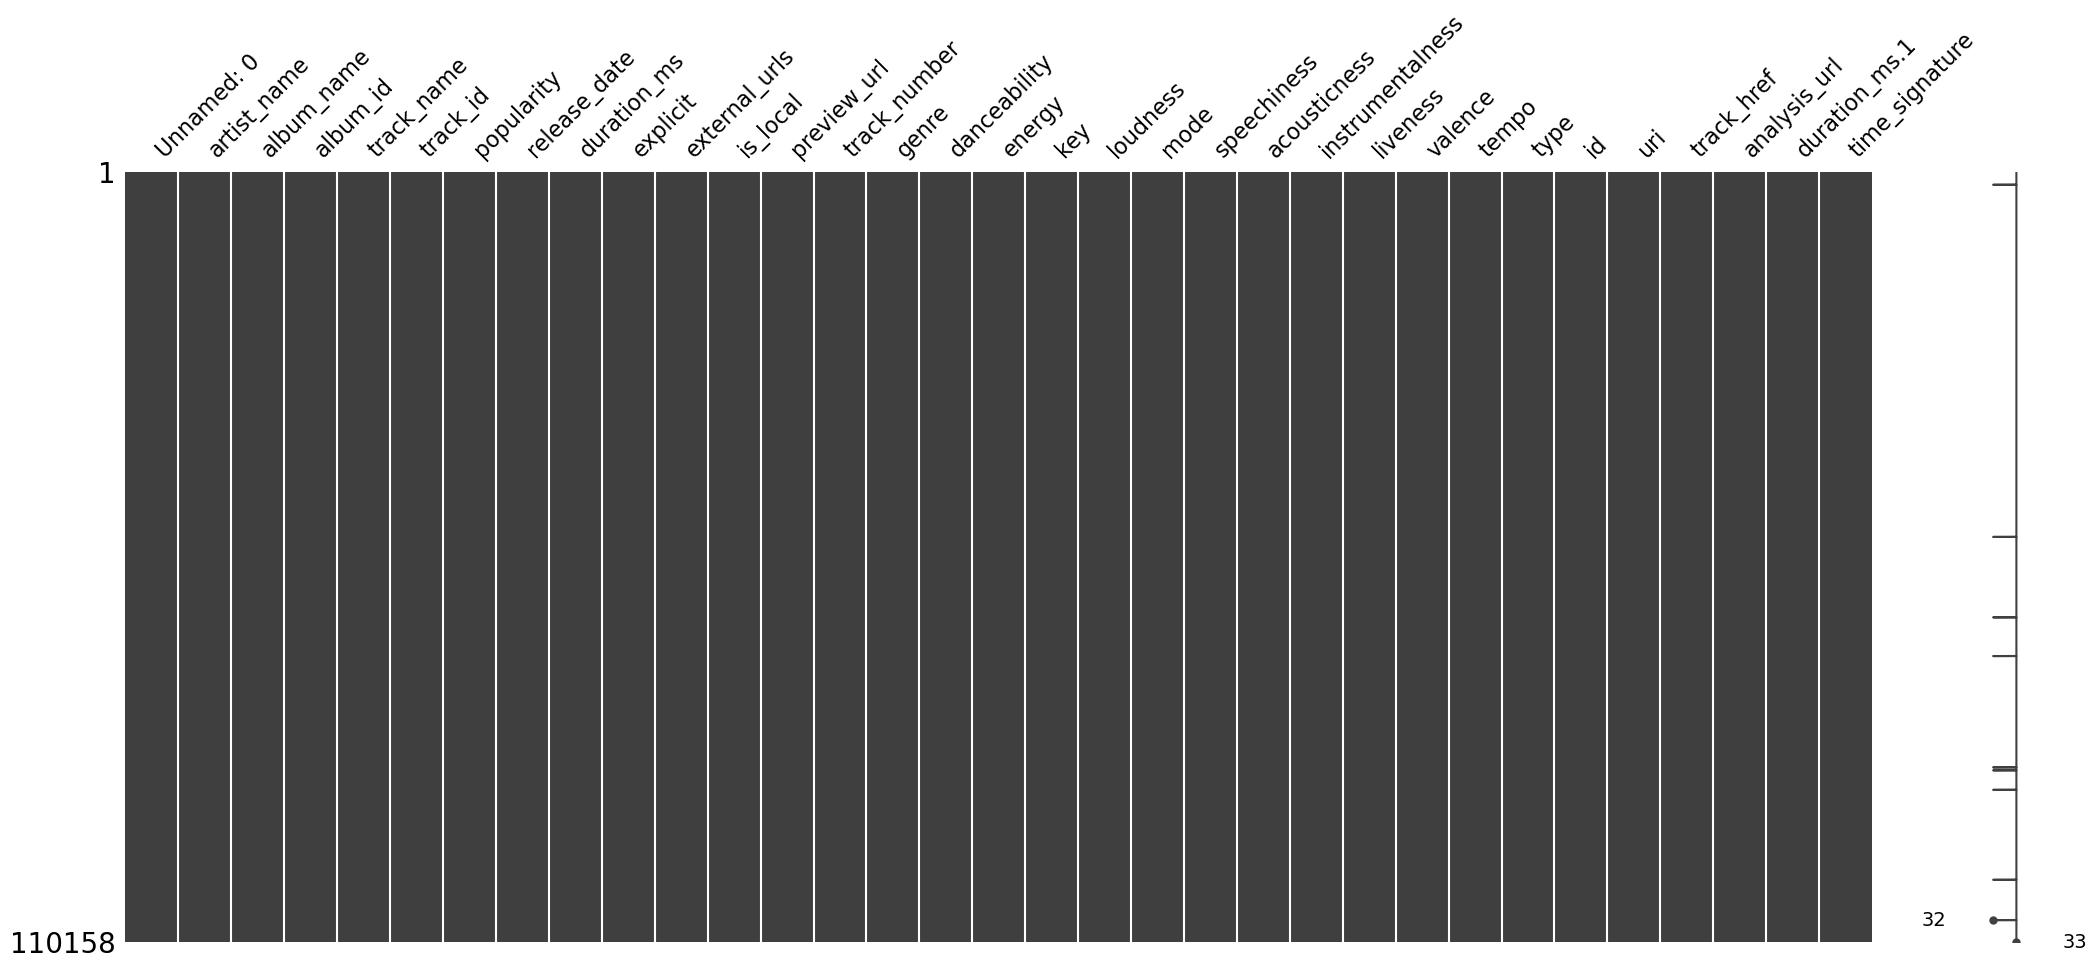

In [12]:
msno.matrix(df)

### Nettoyage

In [13]:
df.isnull().sum() # Vérifier les données manquantes

Unnamed: 0          0
artist_name         0
album_name          4
album_id            0
track_name          1
track_id            0
popularity          0
release_date        0
duration_ms         0
explicit            0
external_urls       0
is_local            0
preview_url         4
track_number        0
genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms.1       0
time_signature      0
dtype: int64

In [53]:
df['id'].duplicated().sum() # Vérifier les données dupliquées

26437

In [15]:
# Traitement des données manquantes
df.dropna() # Supprimer les lignes contenant des valeurs manquantes

,Unnamed: 0,artist_name,album_name,album_id,track_name,track_id,popularity,release_date,duration_ms,explicit,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms.1,time_signature
0,0,Gen Hoshino,Comedy,41ERrwfzos93Xlf6hFBiDn,Comedy,5SuOikwiRyPMVoIQDJUgSV,66,2022-04-08,230666,False,...,0.3580,0.7150,87.917,audio_features,5SuOikwiRyPMVoIQDJUgSV,spotify:track:5SuOikwiRyPMVoIQDJUgSV,https://api.spotify.com/v1/tracks/5SuOikwiRyPM...,https://api.spotify.com/v1/audio-analysis/5SuO...,230667,4
1,1,Ray LaMontagne,I Was Born To Love You,7cwHkTgTHLbCUFB6hRi9QQ,I Was Born To Love You,3PG6V5yuFfo4APiovOQoRv,64,2022-04-08,265843,False,...,0.1960,0.2100,78.036,audio_features,3PG6V5yuFfo4APiovOQoRv,spotify:track:3PG6V5yuFfo4APiovOQoRv,https://api.spotify.com/v1/tracks/3PG6V5yuFfo4...,https://api.spotify.com/v1/audio-analysis/3PG6...,265843,4
2,2,Steve Moakler,Make A Little Room,457Ok9pnF5fAfG7lNUFqHS,Make A Little Room,62yXckrKNy9Sylka6oifst,53,2022-08-12,180493,False,...,0.1060,0.6600,146.031,audio_features,62yXckrKNy9Sylka6oifst,spotify:track:62yXckrKNy9Sylka6oifst,https://api.spotify.com/v1/tracks/62yXckrKNy9S...,https://api.spotify.com/v1/audio-analysis/62yX...,180493,4
3,3,Ben Rector,The Joy of Music,1l4VD485oDSJM23eWJEWJN,Steady Love,6UOkF086zUgYXnqFxqUvEI,55,2022-03-11,224333,False,...,0.1040,0.2380,76.935,audio_features,6UOkF086zUgYXnqFxqUvEI,spotify:track:6UOkF086zUgYXnqFxqUvEI,https://api.spotify.com/v1/tracks/6UOkF086zUgY...,https://api.spotify.com/v1/audio-analysis/6UOk...,224333,4
4,4,Ben Rector,The Joy of Music,1l4VD485oDSJM23eWJEWJN,Living My Best Life,0R7EWhquaAICmyE5MZqt3q,54,2022-03-11,215213,False,...,0.3620,0.6360,178.828,audio_features,0R7EWhquaAICmyE5MZqt3q,spotify:track:0R7EWhquaAICmyE5MZqt3q,https://api.spotify.com/v1/tracks/0R7EWhquaAIC...,https://api.spotify.com/v1/audio-analysis/0R7E...,215213,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110153,110153,Chris Tomlin,Today's Worship Hits 2022,6QqOjkKHOl1x0WAAOI2EXT,Holy Forever,7eh4rgLpOJALudfzgA3FR4,3,2022-07-29,308066,False,...,0.1180,0.2710,144.004,audio_features,7eh4rgLpOJALudfzgA3FR4,spotify:track:7eh4rgLpOJALudfzgA3FR4,https://api.spotify.com/v1/tracks/7eh4rgLpOJAL...,https://api.spotify.com/v1/audio-analysis/7eh4...,308067,4
110154,110154,Chris Tomlin,Top 100 Christian Songs,3QQFxmXILFHkXKvU4jLKKn,I See You,1G3kSoHLjchF3Rkmrnqolm,5,2022-02-28,230673,False,...,0.1040,0.3630,159.974,audio_features,1G3kSoHLjchF3Rkmrnqolm,spotify:track:1G3kSoHLjchF3Rkmrnqolm,https://api.spotify.com/v1/tracks/1G3kSoHLjchF...,https://api.spotify.com/v1/audio-analysis/1G3k...,230673,4
110155,110155,Passion,Top 100 Christian Songs,3QQFxmXILFHkXKvU4jLKKn,Raise A Hallelujah - Live From Passion 2020,31QCB965BIPoT4hDy4JhGb,5,2022-02-28,339994,False,...,0.0681,0.0557,163.942,audio_features,31QCB965BIPoT4hDy4JhGb,spotify:track:31QCB965BIPoT4hDy4JhGb,https://api.spotify.com/v1/tracks/31QCB965BIPo...,https://api.spotify.com/v1/audio-analysis/31QC...,339994,4
110156,110156,Chris Tomlin,Christian Christmas Radio 2022,4FbYMNff6ceTep1X6j3Q2e,Hallelujah - Live,1VtERUVmExaKeC0GKqlXA5,4,2022-11-15,198873,False,...,0.1560,0.5320,86.048,audio_features,1VtERUVmExaKeC0GKqlXA5,spotify:track:1VtERUVmExaKeC0GKqlXA5,https://api.spotify.com/v1/tracks/1VtERUVmExaK...,https://api.spotify.com/v1/audio-analysis/1VtE...,198873,4


In [16]:
df.genre.unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'drum-and-bass', 'dub', 'dubstep', 'edm', 'electro',
       'electronic', 'emo', 'folk', 'forro', 'french', 'funk', 'garage',
       'german', 'gospel', 'goth', 'grindcore', 'groove', 'grunge',
       'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie', 'indie-pop', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop', 'pop-film',
       'power-pop', '

### Analyse

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'duration_ms'}>,
        <AxesSubplot:title={'center':'track_number'}>],
       [<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'duration_ms.1'}>],
       [<AxesSubplot:title={'center':'time_signature'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

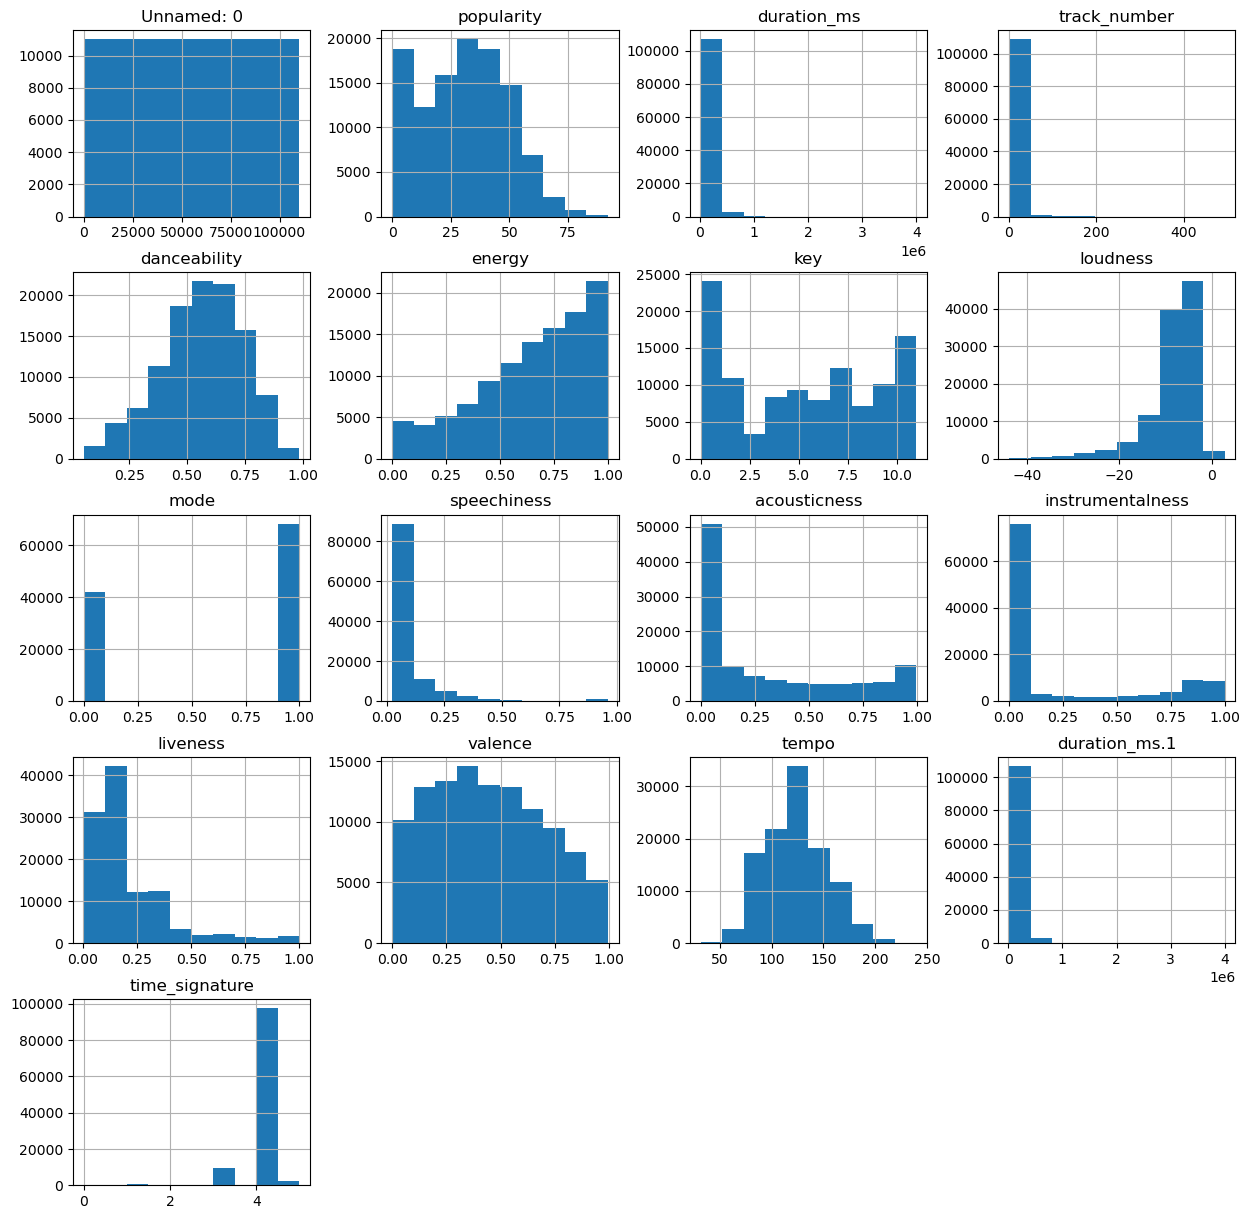

In [17]:
df.hist(figsize=(15, 15))

In [18]:
df.corr() # Calculer la matrice de corrélation entre les colonnes

/tmp/ipykernel_188467/3233471544.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() # Calculer la matrice de corrélation entre les colonnes


,Unnamed: 0,popularity,duration_ms,explicit,is_local,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms.1,time_signature
Unnamed: 0,1.000000,-0.363969,0.023774,-0.029367,NaN,0.084976,-0.011707,-0.003470,-0.000978,-0.020324,-0.001351,0.002407,0.007600,0.026077,0.022471,0.014104,0.001588,0.023716,-0.001837
popularity,-0.363969,1.000000,-0.106454,0.183367,NaN,-0.224165,0.176209,0.071120,0.010345,0.160557,-0.041411,-0.036090,-0.114276,-0.194948,-0.072392,0.012840,0.010857,-0.106691,0.038004
duration_ms,0.023774,-0.106454,1.000000,-0.088636,NaN,-0.108676,-0.121478,0.091976,-0.000813,0.069484,-0.007011,-0.095367,-0.114851,0.064499,0.002513,-0.167732,0.026461,0.999312,0.008179
explicit,-0.029367,0.183367,-0.088636,1.000000,NaN,-0.049818,0.133030,0.099773,0.004927,0.136088,-0.034413,0.309122,-0.108412,-0.175550,0.028629,0.049399,-0.001136,-0.089229,0.039701
is_local,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
track_number,0.084976,-0.224165,-0.108676,-0.049818,NaN,1.000000,-0.040731,-0.104194,0.011299,-0.179569,0.027214,0.001820,0.069272,0.078600,0.039364,0.050988,-0.038466,-0.108808,-0.028787
danceability,-0.011707,0.176209,-0.121478,0.133030,NaN,-0.040731,1.000000,0.134048,0.033253,0.296613,-0.076171,0.104620,-0.175744,-0.184315,-0.127382,0.495335,-0.038175,-0.121498,0.168354
energy,-0.003470,0.071120,0.091976,0.099773,NaN,-0.104194,0.134048,1.000000,0.043845,0.770317,-0.079087,0.099702,-0.768515,-0.226202,0.201428,0.209307,0.268224,0.092517,0.164748
key,-0.000978,0.010345,-0.000813,0.004927,NaN,0.011299,0.033253,0.043845,1.000000,0.029078,-0.158704,0.012383,-0.036142,-0.003882,-0.006040,0.037624,0.008298,-0.001162,0.011948
loudness,-0.020324,0.160557,0.069484,0.136088,NaN,-0.179569,0.296613,0.770317,0.029078,1.000000,-0.045247,0.053201,-0.634641,-0.469752,0.084357,0.280557,0.242675,0.069934,0.165275


In [76]:
df.head(1)

,Unnamed: 0,artist_name,album_name,album_id,track_name,track_id,popularity,release_date,duration_ms,explicit,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms.1,time_signature
0,0,Gen Hoshino,Comedy,41ERrwfzos93Xlf6hFBiDn,Comedy,5SuOikwiRyPMVoIQDJUgSV,66,2022-04-08,230666,False,...,0.358,0.715,87.917,audio_features,5SuOikwiRyPMVoIQDJUgSV,spotify:track:5SuOikwiRyPMVoIQDJUgSV,https://api.spotify.com/v1/tracks/5SuOikwiRyPM...,https://api.spotify.com/v1/audio-analysis/5SuO...,230667,4


/tmp/ipykernel_188467/2360991015.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot:>

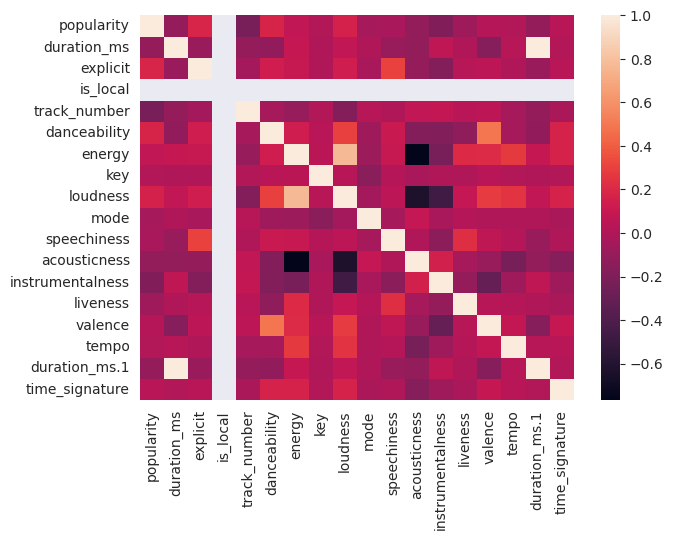

In [80]:
df_pop_heat = df.drop(columns=['Unnamed: 0','artist_name','album_name','album_id','track_name','track_id','release_date', 
                                    'id','uri','track_href','analysis_url'])
correlations = df_pop_heat.corr()
f, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(correlations)


In [64]:
df_grouped = df.groupby(df.genre).mean()
df_group_sorted = df_grouped.sort_values(by='popularity', ascending=False)
df_group_sorted.head(10).index

/tmp/ipykernel_188467/2206035554.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Index(['pop', 'hip-hop', 'dance', 'latin', 'latino', 'indie', 'house', 'edm',
       'electro', 'rock'],
      dtype='object', name='genre')

In [70]:
df_popu = df[df["genre"].isin(['pop', 'hip-hop', 'dance', 'latin', 'latino', 'indie', 'house', 'edm',
       'electro', 'rock'])]

In [71]:
px.box(data_frame=df_popu, y='popularity', color='genre')

In [45]:
# Top 10 most popular songs on Spotify
most = df.query('popularity > 90', inplace = False).sort_values('popularity', ascending = False)
most[:10]

,Unnamed: 0,artist_name,album_name,album_id,track_name,track_id,popularity,release_date,duration_ms,explicit,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms.1,time_signature
1000,1000,David Guetta,I'm Good (Blue),7M842DMhYVALrXsw3ty7B3,I'm Good (Blue),4uUG5RXrOk84mYEfFvj3cK,92,2022-08-26,175238,True,...,0.371,0.304,128.040,audio_features,4uUG5RXrOk84mYEfFvj3cK,spotify:track:4uUG5RXrOk84mYEfFvj3cK,https://api.spotify.com/v1/tracks/4uUG5RXrOk84...,https://api.spotify.com/v1/audio-analysis/4uUG...,175238,4
3959,3959,David Guetta,I'm Good (Blue),7M842DMhYVALrXsw3ty7B3,I'm Good (Blue),4uUG5RXrOk84mYEfFvj3cK,92,2022-08-26,175238,True,...,0.371,0.304,128.040,audio_features,4uUG5RXrOk84mYEfFvj3cK,spotify:track:4uUG5RXrOk84mYEfFvj3cK,https://api.spotify.com/v1/tracks/4uUG5RXrOk84...,https://api.spotify.com/v1/audio-analysis/4uUG...,175238,4
4402,4402,Manuel Turizo,La Bachata,1TpGeAzOJgAGdPkcWl95r2,La Bachata,5ww2BF9slyYgNOk37BlC4u,92,2022-05-26,162637,False,...,0.218,0.850,124.980,audio_features,5ww2BF9slyYgNOk37BlC4u,spotify:track:5ww2BF9slyYgNOk37BlC4u,https://api.spotify.com/v1/tracks/5ww2BF9slyYg...,https://api.spotify.com/v1/audio-analysis/5ww2...,162638,4
3302,3302,Manuel Turizo,La Bachata,1TpGeAzOJgAGdPkcWl95r2,La Bachata,5ww2BF9slyYgNOk37BlC4u,92,2022-05-26,162637,False,...,0.218,0.850,124.980,audio_features,5ww2BF9slyYgNOk37BlC4u,spotify:track:5ww2BF9slyYgNOk37BlC4u,https://api.spotify.com/v1/tracks/5ww2BF9slyYg...,https://api.spotify.com/v1/audio-analysis/5ww2...,162638,4
4352,4352,Manuel Turizo,La Bachata,1TpGeAzOJgAGdPkcWl95r2,La Bachata,5ww2BF9slyYgNOk37BlC4u,92,2022-05-26,162637,False,...,0.218,0.850,124.980,audio_features,5ww2BF9slyYgNOk37BlC4u,spotify:track:5ww2BF9slyYgNOk37BlC4u,https://api.spotify.com/v1/tracks/5ww2BF9slyYg...,https://api.spotify.com/v1/audio-analysis/5ww2...,162638,4
3354,3354,Manuel Turizo,La Bachata,1TpGeAzOJgAGdPkcWl95r2,La Bachata,5ww2BF9slyYgNOk37BlC4u,92,2022-05-26,162637,False,...,0.218,0.850,124.980,audio_features,5ww2BF9slyYgNOk37BlC4u,spotify:track:5ww2BF9slyYgNOk37BlC4u,https://api.spotify.com/v1/tracks/5ww2BF9slyYg...,https://api.spotify.com/v1/audio-analysis/5ww2...,162638,4
3973,3973,Manuel Turizo,La Bachata,1TpGeAzOJgAGdPkcWl95r2,La Bachata,5ww2BF9slyYgNOk37BlC4u,92,2022-05-26,162637,False,...,0.218,0.850,124.980,audio_features,5ww2BF9slyYgNOk37BlC4u,spotify:track:5ww2BF9slyYgNOk37BlC4u,https://api.spotify.com/v1/tracks/5ww2BF9slyYg...,https://api.spotify.com/v1/audio-analysis/5ww2...,162638,4
3950,3950,SZA,SOS,07w0rG5TETcyihsEIZR3qG,Kill Bill,3OHfY25tqY28d16oZczHc8,92,2022-12-09,153946,False,...,0.161,0.430,88.993,audio_features,3OHfY25tqY28d16oZczHc8,spotify:track:3OHfY25tqY28d16oZczHc8,https://api.spotify.com/v1/tracks/3OHfY25tqY28...,https://api.spotify.com/v1/audio-analysis/3OHf...,153947,4
3951,3951,SZA,SOS,1nrVofqDRs7cpWXJ49qTnP,Kill Bill,1Qrg8KqiBpW07V7PNxwwwL,92,2022-12-08,153946,False,...,0.161,0.418,88.980,audio_features,1Qrg8KqiBpW07V7PNxwwwL,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,https://api.spotify.com/v1/tracks/1Qrg8KqiBpW0...,https://api.spotify.com/v1/audio-analysis/1Qrg...,153947,4
1450,1450,David Guetta,I'm Good (Blue),7M842DMhYVALrXsw3ty7B3,I'm Good (Blue),4uUG5RXrOk84mYEfFvj3cK,92,2022-08-26,175238,True,...,0.371,0.304,128.040,audio_features,4uUG5RXrOk84mYEfFvj3cK,spotify:track:4uUG5RXrOk84mYEfFvj3cK,https://api.spotify.com/v1/tracks/4uUG5RXrOk84...,https://api.spotify.com/v1/audio-analysis/4uUG...,175238,4


Text(0, 0.5, 'Genre')

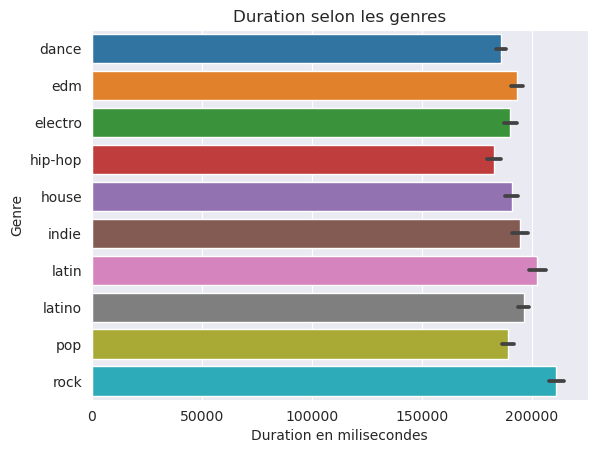

In [73]:
plt.title("Duration selon les genres")
sns.color_palette('rocket', as_cmap=True)
sns.barplot(y='genre', x='duration_ms', data=df_popu)
plt.xlabel('Duration en milisecondes')
plt.ylabel('Genre')

<AxesSubplot:xlabel='popularity', ylabel='Count'>

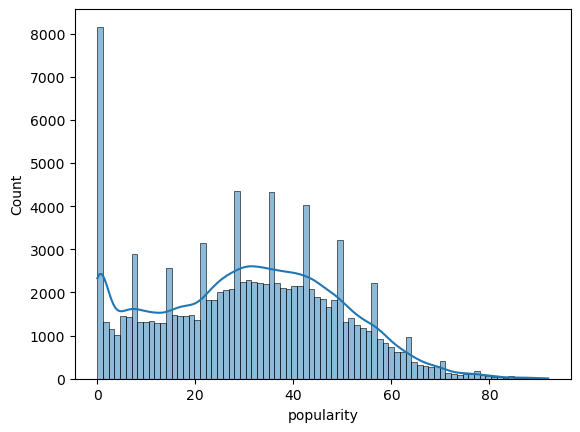

In [21]:
sns.histplot(data=df, x="popularity", kde=True)

<AxesSubplot:xlabel='popularity', ylabel='Count'>

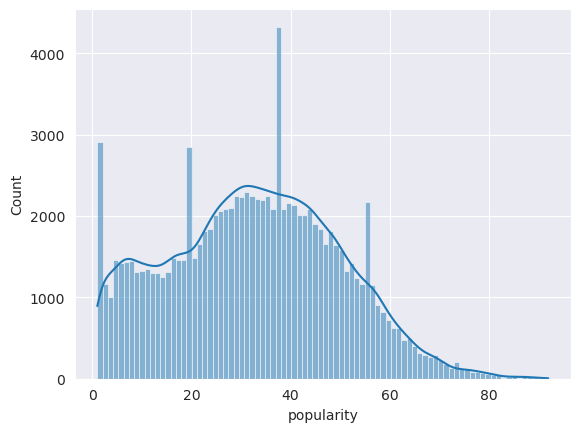

In [75]:
# A LOT of songs have 0 popularity. Let's delete these
predData = df[df.popularity != 0]
sns.histplot(data=predData, x="popularity", kde=True)

In [22]:
df.popularity.value_counts().sort_values()

90       3
91       7
83       7
92      11
86      14
      ... 
32    2244
29    2248
35    2250
31    2296
0     6556
Name: popularity, Length: 93, dtype: int64

[Text(0.5, 1.0, 'Correlation entre Loudness et Energy')]

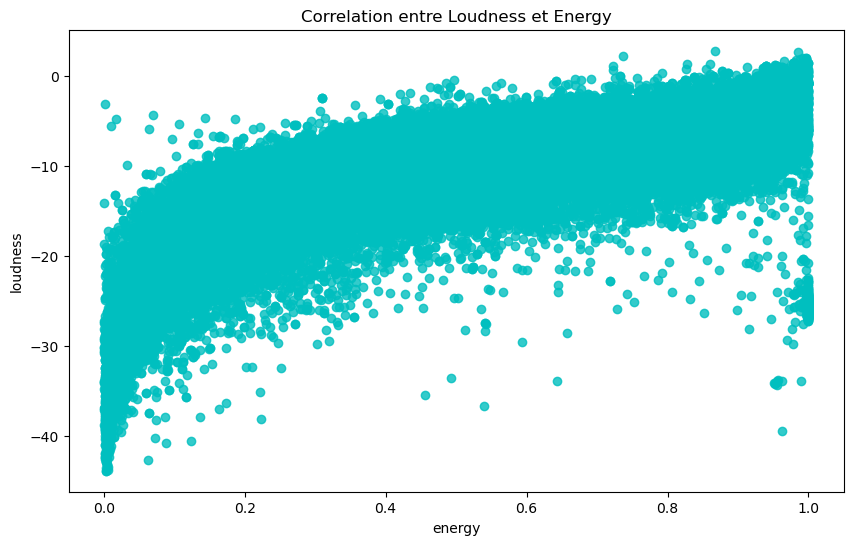

In [48]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, y='loudness', x='energy', color='c').set(title='Correlation entre Loudness et Energy')